<a href="https://colab.research.google.com/github/Nhan-beo123/hw1/blob/main/btvn_th%E1%BA%A7y_th%E1%BB%8Bnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.765541330527183


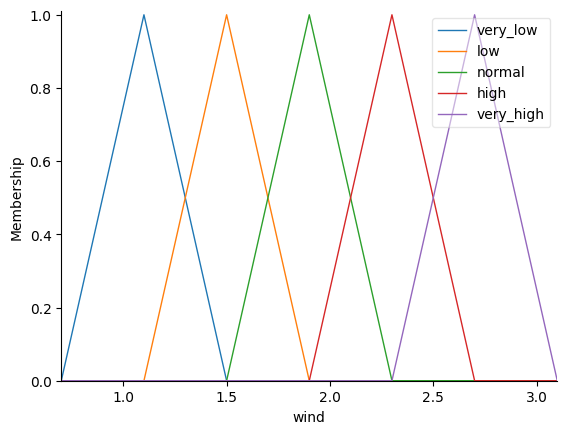

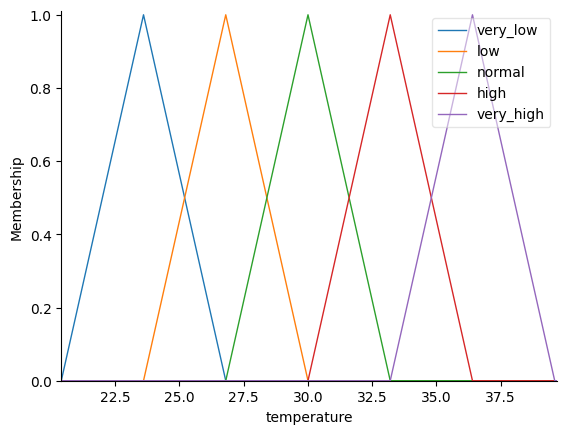

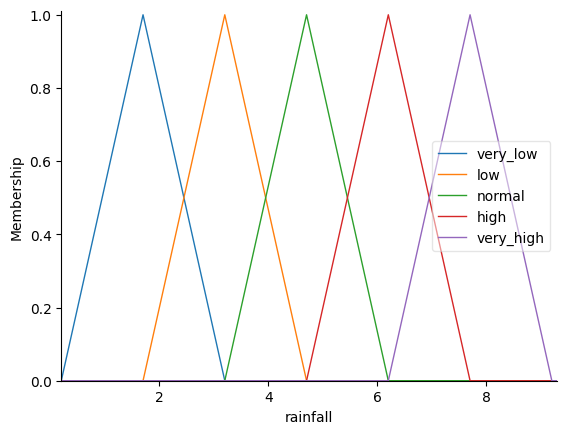

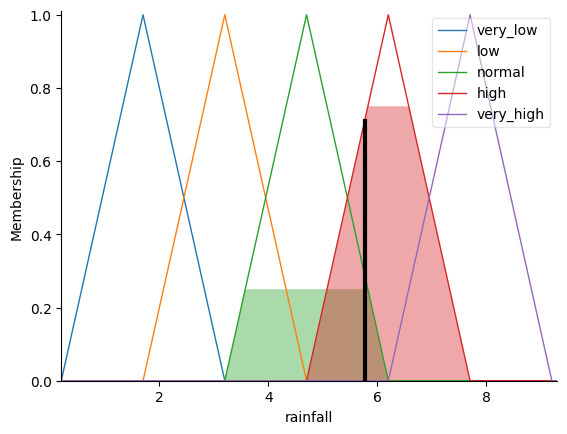

In [ ]:
#2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind=ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4,39.7,0.1),'temperature')
rainfall=ctrl.Consequent(np.arange(0.2,9.3,0.1),'rainfall')
wind['very_low']=fuzz.trimf(wind.universe,[0.7,1.1,1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1,1.5,1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5,1.9,2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9,2.3,2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3,2.7,3.1])
wind.view()

temperature['very_low']=fuzz.trimf(temperature.universe,[20.4,23.6,26.8])
temperature['low']=fuzz.trimf(temperature.universe,[23.6,26.8,30])
temperature['normal']=fuzz.trimf(temperature.universe,[26.8,30,33.2])
temperature['high']=fuzz.trimf(temperature.universe,[30,33.2,36.4])
temperature['very_high']=fuzz.trimf(temperature.universe,[33.2,36.4,39.6])
temperature.view()

rainfall['very_low']=fuzz.trimf(rainfall.universe,[0.2,1.7,3.2])
rainfall['low']=fuzz.trimf(rainfall.universe,[1.7,3.2,4.7])
rainfall['normal']=fuzz.trimf(rainfall.universe,[3.2,4.7,6.2])
rainfall['high']=fuzz.trimf(rainfall.universe,[4.7,6.2,7.7])
rainfall['very_high']=fuzz.trimf(rainfall.universe,[6.2,7.7,9.2])
rainfall.view()

rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_high'])
rule6 = ctrl.Rule(wind['very_low'] & temperature['high'], rainfall['low'])
rule7 = ctrl.Rule(wind['high'] & temperature['very_low'], rainfall['low'])
rule8 = ctrl.Rule(wind['low'] & temperature['very_high'], rainfall['normal'])
rule9 = ctrl.Rule(wind['very_high'] & temperature['low'], rainfall['normal'])
rule10 = ctrl.Rule(wind['normal'] & temperature['high'], rainfall['high'])
rule11 = ctrl.Rule(wind['high'] & temperature['normal'], rainfall['high'])
rule12 = ctrl.Rule(wind['very_high'] & temperature['normal'], rainfall['very_high'])
rule13 = ctrl.Rule(wind['normal'] & temperature['low'], rainfall['low'])
rule14 = ctrl.Rule(wind['low'] & temperature['normal'], rainfall['low'])
rule15 = ctrl.Rule(wind['normal'] & temperature['very_high'], rainfall['high'])
rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,rule14,rule15])
rainfall_sim=ctrl.ControlSystemSimulation(rainfall_ctrl)
rainfall_sim.input['wind']=2.2
rainfall_sim.input['temperature']=30
rainfall_sim.compute()
print(rainfall_sim.output['rainfall'])
rainfall.view(sim=rainfall_sim)

Nguy cơ tiểu đường: 89.79166666666664


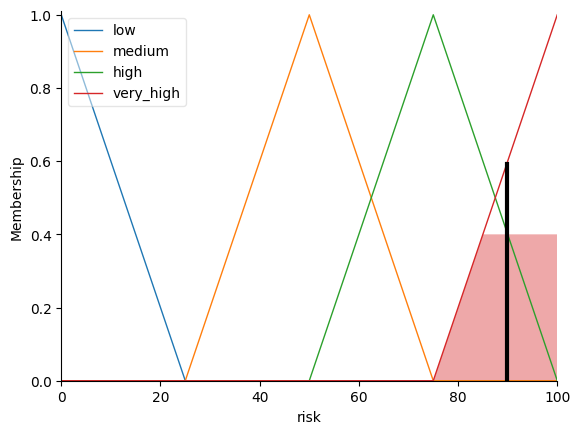

In [ ]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar=ctrl.Antecedent(np.arange(0,301,1),'blood_sugar')
bmi=ctrl.Antecedent(np.arange(10,50,0.1),'bmi')
urination=ctrl.Antecedent(np.arange(0,11,1),'urination')
fatigue=ctrl.Antecedent(np.arange(0,11,1),'fatigue')
risk=ctrl.Consequent(np.arange(0,101,1),'risk')

blood_sugar['low']=fuzz.trimf(blood_sugar.universe,[0,0,80])
blood_sugar['normal']=fuzz.trimf(blood_sugar.universe,[80,120,160])
blood_sugar['high']=fuzz.trimf(blood_sugar.universe,[120,160,200])
blood_sugar['very_high']=fuzz.trimf(blood_sugar.universe,[200,250,300])

bmi['underweight']=fuzz.trimf(bmi.universe,[10,10,18.5])
bmi['normal']=fuzz.trimf(bmi.universe,[18.5,21.7,24.9])
bmi['overweight']=fuzz.trimf(bmi.universe,[25,27.45,29.9])
bmi['obese']=fuzz.trimf(bmi.universe,[30,40,50])

urination['rarely'] = fuzz.trimf(urination.universe, [0, 0, 3])
urination['sometimes'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['often'] = fuzz.trimf(urination.universe, [7, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 3])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [7, 10, 10])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 25])
risk['medium'] = fuzz.trimf(risk.universe, [25, 50, 75])
risk['high'] = fuzz.trimf(risk.universe, [50, 75, 100])
risk['very_high'] = fuzz.trimf(risk.universe, [75, 100, 100])

rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'], risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['often'], risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rarely'], risk['low'])

rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & bmi['normal'], risk['low'])

rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], risk['low'])

risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

risk_sim.input['blood_sugar'] = 220
risk_sim.input['bmi'] = 32
risk_sim.input['urination'] = 8
risk_sim.input['fatigue'] = 9

risk_sim.compute()

risk.view(sim=risk_sim)
print('Nguy cơ tiểu đường:',risk_sim.output['risk'])

Final Price:  7.411764705882353


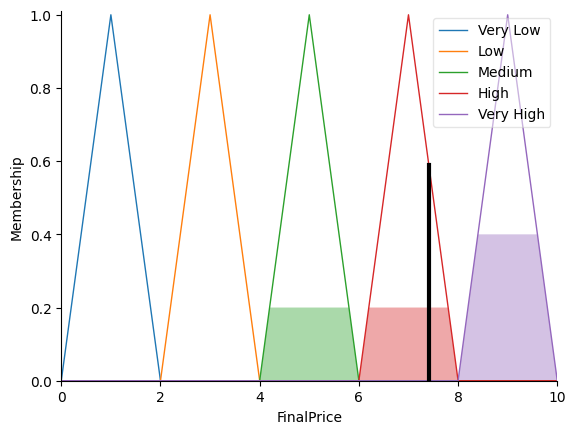

In [ ]:
#2.3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

Demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Demand')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 11, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 11, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'StockLevel')
FinalPrice = ctrl.Consequent(np.arange(0, 11, 1), 'FinalPrice')

Demand['low'] = fuzz.trimf(Demand.universe, [0, 0, 5])
Demand['medium'] = fuzz.trimf(Demand.universe, [2.5, 5, 7.5])
Demand['high'] = fuzz.trimf(Demand.universe, [5, 10, 10])

CompetitorPricing['low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 5])
CompetitorPricing['medium'] = fuzz.trimf(CompetitorPricing.universe, [2.5, 5, 7.5])
CompetitorPricing['high'] = fuzz.trimf(CompetitorPricing.universe, [5, 10, 10])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 5])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [2.5, 5, 7.5])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [5, 10, 10])

Seasonality['offpeak'] = fuzz.trimf(Seasonality.universe, [0, 0, 5])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [2.5, 5, 7.5])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [5, 10, 10])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 5])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [2.5, 5, 7.5])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [5, 10, 10])


FinalPrice['Very Low'] = fuzz.trimf(FinalPrice.universe, [0, 1, 2])
FinalPrice['Low'] = fuzz.trimf(FinalPrice.universe, [2,3,4])
FinalPrice['Medium'] = fuzz.trimf(FinalPrice.universe, [4,5,6])
FinalPrice['High'] = fuzz.trimf(FinalPrice.universe, [6,7,8])
FinalPrice['Very High'] = fuzz.trimf(FinalPrice.universe, [8,9,10])

rule1 = ctrl.Rule(Demand['high'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['Very High'])
rule2 = ctrl.Rule(Demand['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['Very High'])
rule3 = ctrl.Rule(Demand['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['Very High'])

rule4 = ctrl.Rule(Demand['high'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['High'])
rule5 = ctrl.Rule(Demand['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['High'])
rule6 = ctrl.Rule(Demand['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['High'])
rule7 = ctrl.Rule(Demand['high'] &  Seasonality['peak'] & StockLevel['medium'], FinalPrice['High'])

rule8 = ctrl.Rule(Demand['medium'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['Medium'])
rule9 = ctrl.Rule(Demand['low'] & CompetitorPricing['high'] & StockLevel['medium'], FinalPrice['Medium'])
rule10 = ctrl.Rule(Demand['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['Medium'])

rule11 = ctrl.Rule(Demand['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule12 = ctrl.Rule(Demand['medium'] &ProductionCost['low']& StockLevel['high'], FinalPrice['Low'])
rule13 = ctrl.Rule(Demand['low'] & Seasonality['offpeak'] & StockLevel['high'], FinalPrice['Low'])

rule14 = ctrl.Rule(Demand['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule15 = ctrl.Rule(Demand['low'] & Seasonality['offpeak'] & StockLevel['high'], FinalPrice['Very Low'])
rule16 = ctrl.Rule(Demand['medium'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule17 = ctrl.Rule(Demand['medium'] &  CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing.input['Demand'] = 7
pricing.input['CompetitorPricing'] = 5
pricing.input['ProductionCost'] = 6
pricing.input['Seasonality'] = 8
pricing.input['StockLevel'] = 3

pricing.compute()

print('Final Price: ',pricing.output['FinalPrice'])
FinalPrice.view(sim=pricing)

Wash Time:  6.439388145315491
Water Level:  5.65300546448087


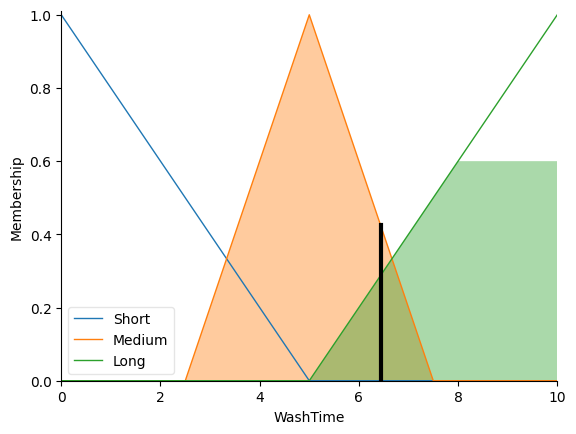

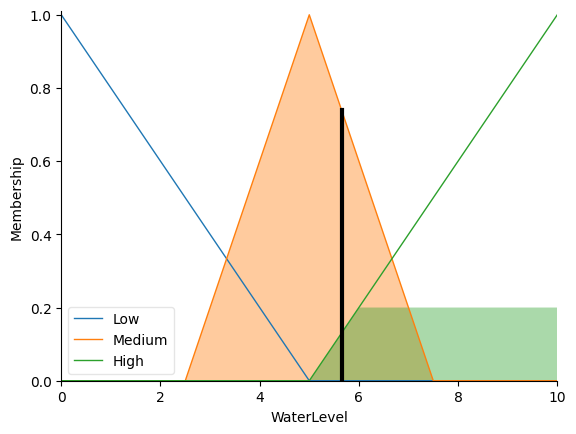

In [ ]:
#2.4
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

Load = ctrl.Antecedent(np.arange(0, 11, 1), 'Load')
DirtLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'DirtLevel')
FabricType = ctrl.Antecedent(np.arange(0, 11, 1), 'FabricType')
WashTime = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'WashTime')
WaterLevel = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'WaterLevel')

Load['Small'] = fuzz.trimf(Load.universe, [0, 0, 5])
Load['Medium'] = fuzz.trimf(Load.universe, [2.5, 5, 7.5])
Load['Large'] = fuzz.trimf(Load.universe, [5, 10, 10])

DirtLevel['Low'] = fuzz.trimf(DirtLevel.universe, [0, 0, 5])
DirtLevel['Medium'] = fuzz.trimf(DirtLevel.universe, [2.5, 5, 7.5])
DirtLevel['High'] = fuzz.trimf(DirtLevel.universe, [5, 10, 10])

FabricType['Delicate'] = fuzz.trimf(FabricType.universe, [0, 0, 5])
FabricType['Normal'] = fuzz.trimf(FabricType.universe, [2.5, 5, 7.5])
FabricType['Heavy'] = fuzz.trimf(FabricType.universe, [5, 10, 10])


WashTime['Short'] = fuzz.trimf(WashTime.universe, [0, 0, 5])
WashTime['Medium'] = fuzz.trimf(WashTime.universe, [2.5, 5, 7.5])
WashTime['Long'] = fuzz.trimf(WashTime.universe, [5, 10, 10])

WaterLevel['Low'] = fuzz.trimf(WaterLevel.universe, [0, 0, 5])
WaterLevel['Medium'] = fuzz.trimf(WaterLevel.universe, [2.5, 5, 7.5])
WaterLevel['High'] = fuzz.trimf(WaterLevel.universe, [5, 10, 10])

rules = [
    ctrl.Rule(Load['Small'] & DirtLevel['Low'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(Load['Small'] & DirtLevel['Medium'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Small'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Low'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Medium'], (WashTime['Long'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['Low'], (WashTime['Medium'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['Medium'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(FabricType['Delicate'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(FabricType['Normal'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(FabricType['Heavy'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['High'] & FabricType['Heavy'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Small'] & DirtLevel['Low'] & FabricType['Delicate'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Medium'] & FabricType['Normal'], (WashTime['Medium'], WaterLevel['Medium']))
]

washing_ctrl = ctrl.ControlSystem(rules)
washing = ctrl.ControlSystemSimulation(washing_ctrl)

washing.input['Load'] = 6
washing.input['DirtLevel'] = 4
washing.input['FabricType'] = 5

washing.compute()

print('Wash Time: ',washing.output['WashTime'])
print('Water Level: ',washing.output['WaterLevel'])

WashTime.view(sim=washing)
WaterLevel.view(sim=washing)

Fan Speed:  4.753503931844546
Cooling Level:  5.218390674910511


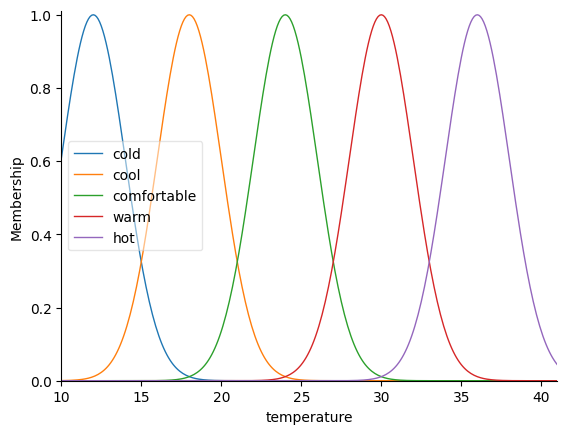

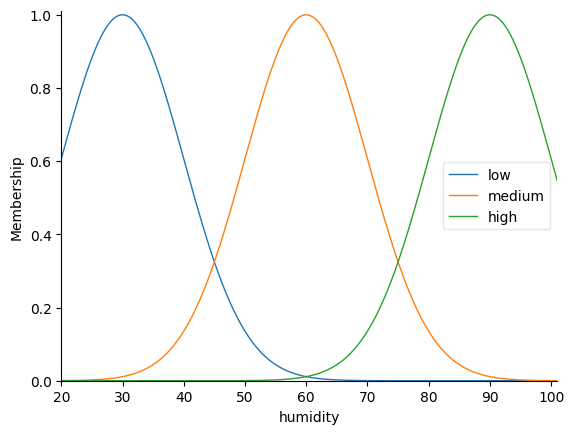

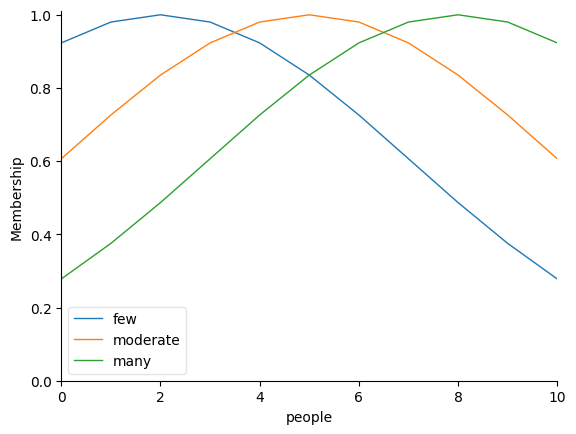

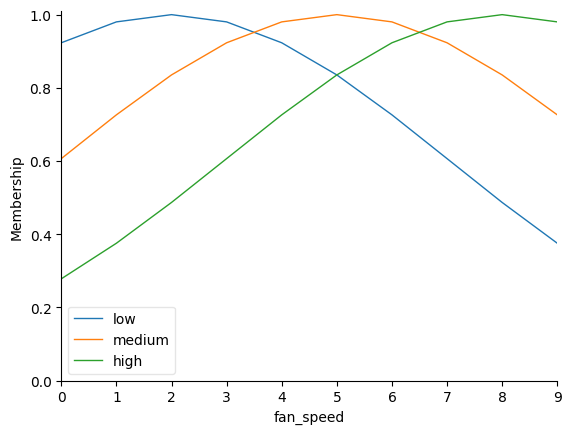

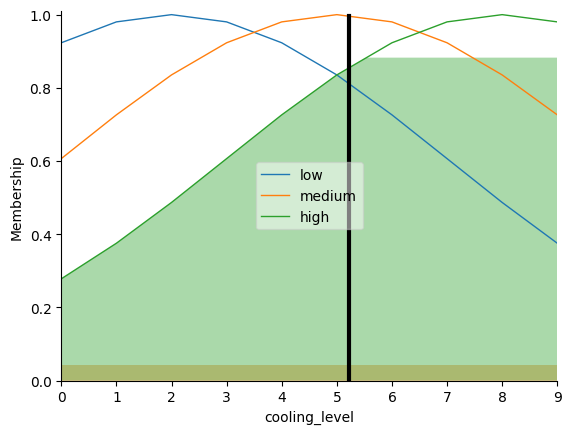

In [14]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(10, 41.1, 0.1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101.1, 0.1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')
fan_speed = ctrl.Consequent(np.arange(0, 10, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 10, 1), 'cooling_level')

temperature['cold'] = fuzz.gaussmf(temperature.universe, 12, 2)
temperature['cool'] = fuzz.gaussmf(temperature.universe, 18, 2)
temperature['comfortable'] = fuzz.gaussmf(temperature.universe, 24, 2)
temperature['warm'] = fuzz.gaussmf(temperature.universe, 30, 2)
temperature['hot'] = fuzz.gaussmf(temperature.universe, 36, 2)

humidity['low'] = fuzz.gaussmf(humidity.universe, 30, 10)
humidity['medium'] = fuzz.gaussmf(humidity.universe, 60, 10)
humidity['high'] = fuzz.gaussmf(humidity.universe, 90, 10)

people['few'] = fuzz.gaussmf(people.universe, 2, 5)
people['moderate'] = fuzz.gaussmf(people.universe, 5, 5)
people['many'] = fuzz.gaussmf(people.universe, 8, 5)

fan_speed['low'] = fuzz.gaussmf(fan_speed.universe, 2, 5)
fan_speed['medium'] = fuzz.gaussmf(fan_speed.universe, 5, 5)
fan_speed['high'] = fuzz.gaussmf(fan_speed.universe, 8, 5)

cooling_level['low'] = fuzz.gaussmf(cooling_level.universe, 2, 5)
cooling_level['medium'] = fuzz.gaussmf(cooling_level.universe, 5, 5)
cooling_level['high'] = fuzz.gaussmf(cooling_level.universe, 8, 5)

rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['hot'], fan_speed['high'])

rule6 = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7 = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8 = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule9 = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10 = ctrl.Rule(temperature['hot'], cooling_level['high'])

rule11 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule12 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule14 = ctrl.Rule(people['few'], fan_speed['low'])
rule15 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16 = ctrl.Rule(people['many'], fan_speed['high'])

rule17 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'],
                   [fan_speed['high'], cooling_level['high']])
rule18 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'],
                   [fan_speed['medium'], cooling_level['medium']])
rule19 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'],
                   [fan_speed['low'], cooling_level['low']])

dh_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                              rule10, rule11, rule12, rule13, rule14, rule15, rule16,
                              rule17, rule18, rule19])
dh_sim = ctrl.ControlSystemSimulation(dh_ctrl)

dh_sim.input['temperature'] = 32
dh_sim.input['humidity'] = 85
dh_sim.input['people'] = 7

dh_sim.compute()

print('Fan Speed: ' ,dh_sim.output['fan_speed'])
print('Cooling Level: ',dh_sim.output['cooling_level'])

temperature.view()
humidity.view()
people.view()
fan_speed.view()
cooling_level.view(sim=dh_sim)

Cooking Time:  6.786713984707119
Power Level:  6.012369165045266


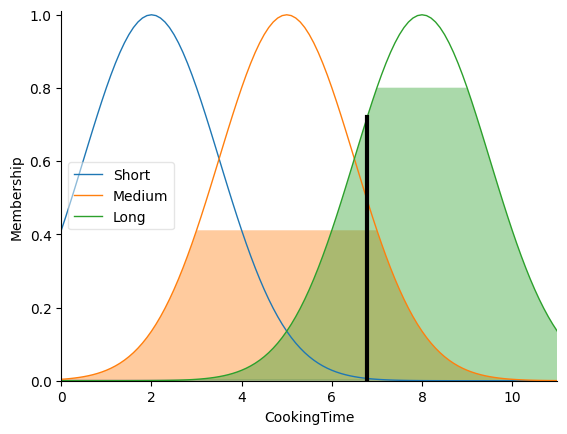

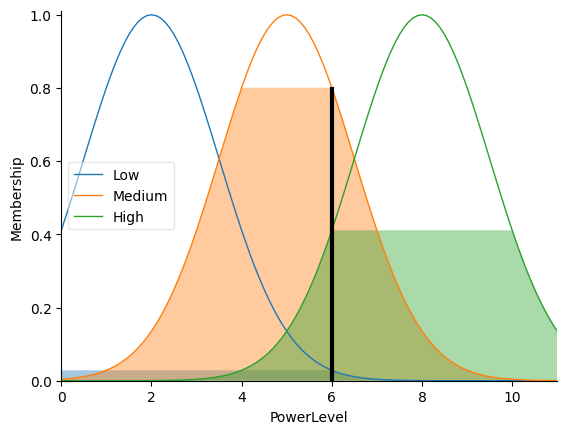

In [3]:
#bài2.6
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

FoodWeight = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodWeight')
FoodType = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodType')
FoodTemperature = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodTemperature')

CookingTime = ctrl.Consequent(np.arange(0, 11.1, 0.1), 'CookingTime')
PowerLevel = ctrl.Consequent(np.arange(0, 11.1, 0.1), 'PowerLevel')

FoodWeight['Light'] = fuzz.gaussmf(FoodWeight.universe, 2, 1.5)
FoodWeight['Medium'] = fuzz.gaussmf(FoodWeight.universe, 5, 1.5)
FoodWeight['Heavy'] = fuzz.gaussmf(FoodWeight.universe, 8, 1.5)

FoodType['Soft'] = fuzz.gaussmf(FoodType.universe, 2, 1.5)
FoodType['Medium'] = fuzz.gaussmf(FoodType.universe, 5, 1.5)
FoodType['Hard'] = fuzz.gaussmf(FoodType.universe, 8, 1.5)

FoodTemperature['Cold'] = fuzz.gaussmf(FoodTemperature.universe, 2, 1.5)
FoodTemperature['Warm'] = fuzz.gaussmf(FoodTemperature.universe, 5, 1.5)
FoodTemperature['Hot'] = fuzz.gaussmf(FoodTemperature.universe, 8, 1.5)


CookingTime['Short'] = fuzz.gaussmf(CookingTime.universe, 2, 1.5)
CookingTime['Medium'] = fuzz.gaussmf(CookingTime.universe, 5, 1.5)
CookingTime['Long'] = fuzz.gaussmf(CookingTime.universe, 8, 1.5)

PowerLevel['Low'] = fuzz.gaussmf(PowerLevel.universe, 2, 1.5)
PowerLevel['Medium'] = fuzz.gaussmf(PowerLevel.universe, 5, 1.5)
PowerLevel['High'] = fuzz.gaussmf(PowerLevel.universe, 8, 1.5)


rule1 = ctrl.Rule(FoodWeight['Light'], CookingTime['Short'])
rule2 = ctrl.Rule(FoodWeight['Medium'], CookingTime['Medium'])
rule3 = ctrl.Rule(FoodWeight['Heavy'], CookingTime['Long'])

rule4 = ctrl.Rule(FoodType['Soft'], PowerLevel['Low'])
rule5 = ctrl.Rule(FoodType['Medium'], PowerLevel['Medium'])
rule6 = ctrl.Rule(FoodType['Hard'], PowerLevel['High'])

rule7 = ctrl.Rule(FoodTemperature['Cold'], CookingTime['Long'])
rule8 = ctrl.Rule(FoodTemperature['Warm'], CookingTime['Medium'])
rule9 = ctrl.Rule(FoodTemperature['Hot'], CookingTime['Short'])

rule10 = ctrl.Rule(FoodWeight['Heavy'] & FoodType['Hard'] & FoodTemperature['Cold'],
                   CookingTime['Long'], PowerLevel['High'])
rule11 = ctrl.Rule(FoodWeight['Medium'] & FoodType['Soft'] & FoodTemperature['Warm'],
                   CookingTime['Medium'], PowerLevel['Low'])
rule12 = ctrl.Rule(FoodWeight['Light'] & FoodType['Medium'] & FoodTemperature['Hot'],
                   CookingTime['Short'], PowerLevel['Medium'])


microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                     rule7, rule8, rule9, rule10, rule11, rule12])
microwave = ctrl.ControlSystemSimulation(microwave_ctrl)

microwave.input['FoodWeight'] = 7
microwave.input['FoodType'] = 6
microwave.input['FoodTemperature'] = 3

microwave.compute()

print('Cooking Time: ',microwave.output['CookingTime'])
print('Power Level: ',microwave.output['PowerLevel'])

CookingTime.view(sim=microwave)
PowerLevel.view(sim=microwave)

In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.3 MB/s eta 0:00:00


Thời gian nấu:  5.166666666666666
Mức nhiệt:  59.99999999999999


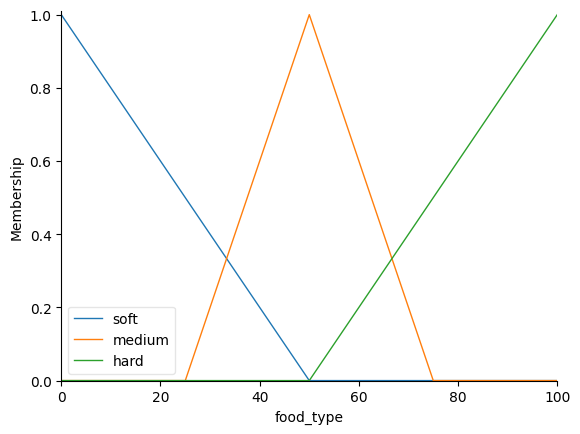

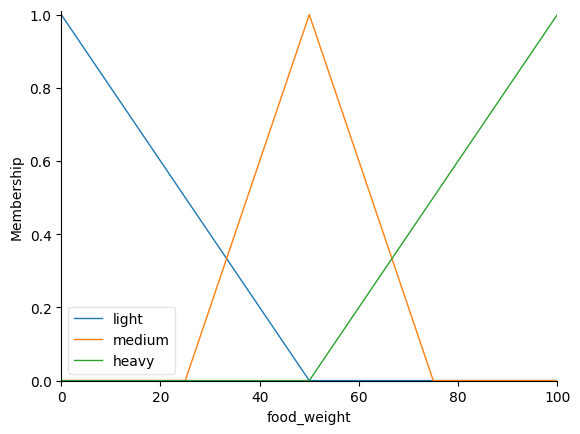

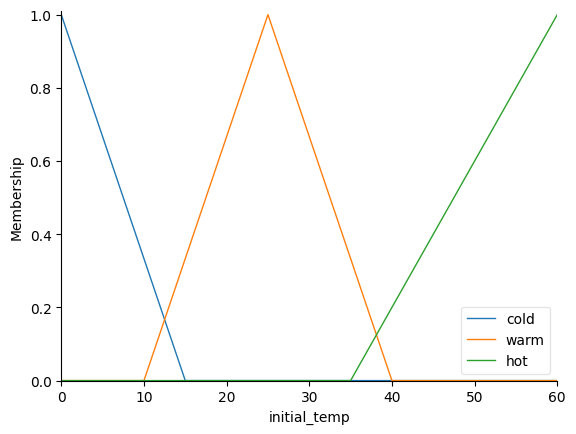

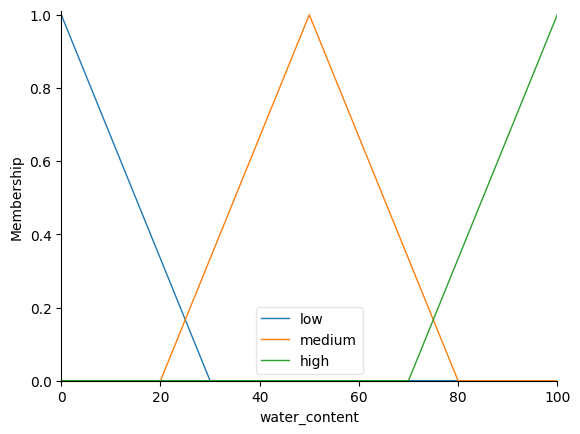

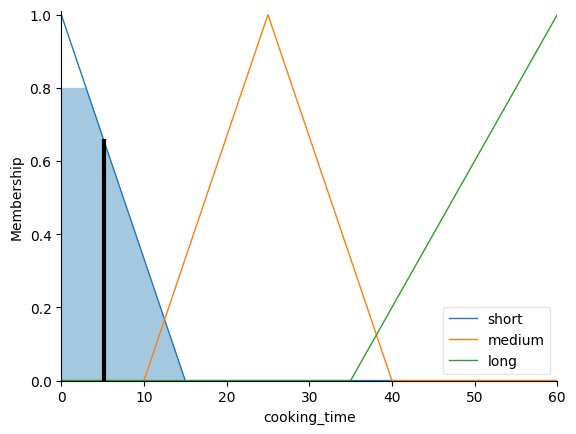

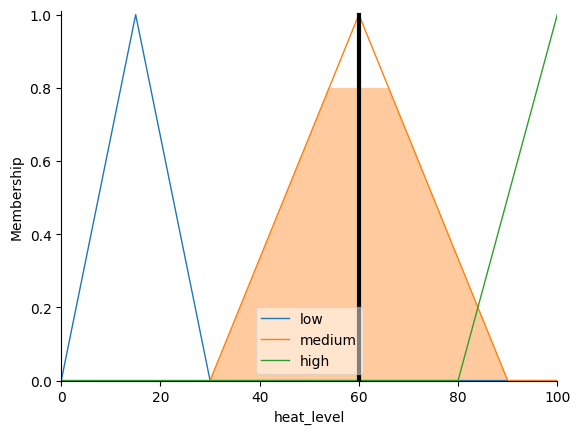

In [9]:
#2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

food_type = ctrl.Antecedent(np.arange(0, 101, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 101, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 101, 1), 'water_content')

cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 50])
food_type['medium'] = fuzz.trimf(food_type.universe, [25, 50, 75])
food_type['hard'] = fuzz.trimf(food_type.universe, [50, 100, 100])

food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 50])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [25, 50, 75])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [50, 100, 100])

initial_temp['cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 15])
initial_temp['warm'] = fuzz.trimf(initial_temp.universe, [10, 25, 40])
initial_temp['hot'] = fuzz.trimf(initial_temp.universe, [35, 60, 60])

water_content['low'] = fuzz.trimf(water_content.universe, [0, 0, 30])
water_content['medium'] = fuzz.trimf(water_content.universe, [20, 50, 80])
water_content['high'] = fuzz.trimf(water_content.universe, [70, 100, 100])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 15])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [10, 25, 40])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [35, 60, 60])

heat_level['low'] = fuzz.trimf(heat_level.universe, [0, 15, 30])
heat_level['medium'] = fuzz.trimf(heat_level.universe, [30, 60, 90])
heat_level['high'] = fuzz.trimf(heat_level.universe, [80, 100, 100])

rule1 = ctrl.Rule(food_type['soft'] & food_weight['light'] & initial_temp['warm'] & water_content['medium'],
                  (cooking_time['short'], heat_level['medium']))
rule2 = ctrl.Rule(food_type['medium'] & food_weight['medium'] & initial_temp['cold'] & water_content['medium'],
                  (cooking_time['medium'], heat_level['medium']))
rule3 = ctrl.Rule(food_type['hard'] & food_weight['heavy'] & initial_temp['cold'] & water_content['high'],
                  (cooking_time['long'], heat_level['high']))
rule4 = ctrl.Rule(food_type['soft'] & food_weight['heavy'] & initial_temp['hot'] & water_content['low'],
                  (cooking_time['short'], heat_level['low']))
rule5 = ctrl.Rule(food_type['hard'] & food_weight['light'] & initial_temp['warm'] & water_content['low'],
                  (cooking_time['medium'], heat_level['high']))

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)

cooking_sim.input['food_type'] = 10
cooking_sim.input['food_weight'] = 10
cooking_sim.input['initial_temp'] = 25
cooking_sim.input['water_content'] = 50
cooking_sim.compute()

print('Thời gian nấu: ', cooking_sim.output['cooking_time'])
print('Mức nhiệt: ', cooking_sim.output['heat_level'])


food_type.view()
food_weight.view()
initial_temp.view()
water_content.view()
cooking_time.view(sim=cooking_sim)
heat_level.view(sim=cooking_sim)

Medication Dose:  68.00000000000001
Oxygen Therapy:  49.999999999999986
Fluids:  80.00000000000004


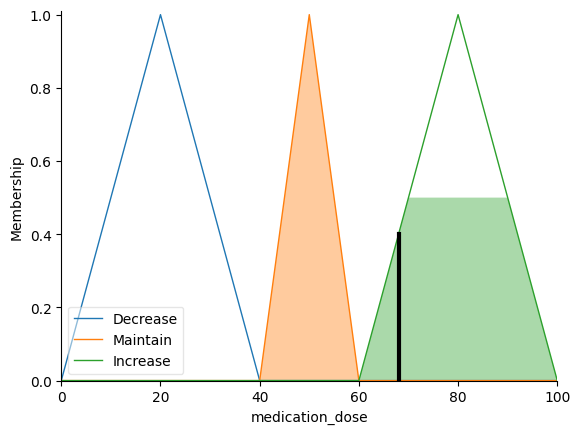

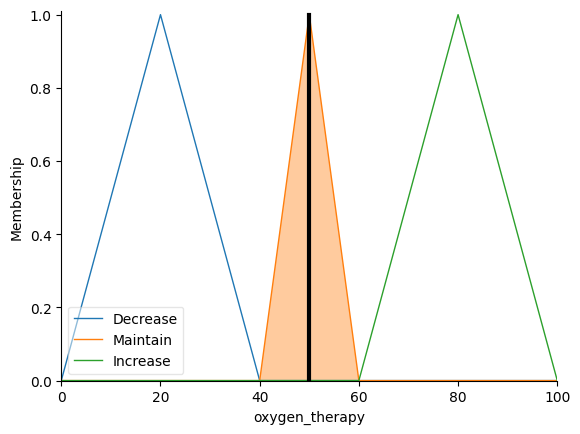

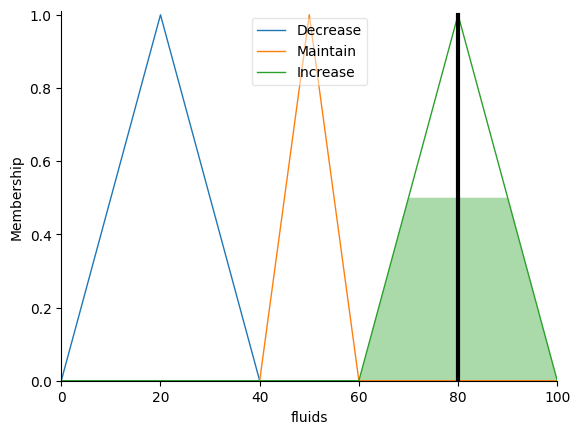

In [ ]:
#bài2.8
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temp')
oxygen_saturation = ctrl.Antecedent(np.arange(85, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 101, 1), 'medication_dose')
fluids = ctrl.Consequent(np.arange(0, 101, 1), 'fluids')
oxygen_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxygen_therapy')

heart_rate['Low'] = fuzz.trimf(heart_rate.universe, [40, 50, 60])
heart_rate['Normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['High'] = fuzz.trimf(heart_rate.universe, [100, 120, 160])

blood_pressure['Low'] = fuzz.trimf(blood_pressure.universe, [60, 75, 90])
blood_pressure['Normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 130])
blood_pressure['High'] = fuzz.trimf(blood_pressure.universe, [130, 150, 180])

body_temp['Low'] = fuzz.trimf(body_temp.universe, [34, 35, 36])
body_temp['Normal'] = fuzz.trimf(body_temp.universe, [36, 37, 38])
body_temp['High'] = fuzz.trimf(body_temp.universe, [38, 39, 40])

oxygen_saturation['Low'] = fuzz.trimf(oxygen_saturation.universe, [85, 87, 90])
oxygen_saturation['Normal'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['Low'] = fuzz.trimf(blood_sugar.universe, [50, 60, 70])
blood_sugar['Normal'] = fuzz.trimf(blood_sugar.universe, [70, 110, 140])
blood_sugar['High'] = fuzz.trimf(blood_sugar.universe, [140, 160, 200])

medication_dose['Decrease'] = fuzz.trimf(medication_dose.universe, [0, 20, 40])
medication_dose['Maintain'] = fuzz.trimf(medication_dose.universe, [40, 50, 60])
medication_dose['Increase'] = fuzz.trimf(medication_dose.universe, [60, 80, 100])

fluids['Decrease'] = fuzz.trimf(fluids.universe, [0, 20, 40])
fluids['Maintain'] = fuzz.trimf(fluids.universe, [40, 50, 60])
fluids['Increase'] = fuzz.trimf(fluids.universe, [60, 80, 100])

oxygen_therapy['Decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 20, 40])
oxygen_therapy['Maintain'] = fuzz.trimf(oxygen_therapy.universe, [40, 50, 60])
oxygen_therapy['Increase'] = fuzz.trimf(oxygen_therapy.universe, [60, 80, 100])

rule1 = ctrl.Rule(heart_rate['Low'] & blood_pressure['Low'],
                  (medication_dose['Increase'], fluids['Increase']))
rule2 = ctrl.Rule(heart_rate['High'] & blood_pressure['High'],
                  medication_dose['Decrease'])
rule3 = ctrl.Rule(heart_rate['Normal'] & blood_pressure['Normal'],
                  medication_dose['Maintain'])
rule4 = ctrl.Rule(body_temp['High'] & oxygen_saturation['Low'],
                  (oxygen_therapy['Increase'], medication_dose['Increase']))
rule5 = ctrl.Rule(body_temp['Normal'] & oxygen_saturation['Normal'],
                  (oxygen_therapy['Maintain'], medication_dose['Maintain']))
rule6 = ctrl.Rule(body_temp['Low'] & oxygen_saturation['Low'],
                  (oxygen_therapy['Increase'], fluids['Increase']))
rule7 = ctrl.Rule(blood_sugar['High'], medication_dose['Increase'])
rule8 = ctrl.Rule(blood_sugar['Low'], medication_dose['Decrease'])
rule9 = ctrl.Rule(blood_sugar['Normal'], medication_dose['Maintain'])
rule10 = ctrl.Rule(blood_pressure['High'] & blood_sugar['High'] & heart_rate['High'],
                   medication_dose['Decrease'])
rule11 = ctrl.Rule(blood_pressure['Low'] & oxygen_saturation['Low'] & heart_rate['Low'],
                   (fluids['Increase'], oxygen_therapy['Increase'], medication_dose['Increase']))
rule12 = ctrl.Rule(body_temp['High'] & blood_pressure['High'] & oxygen_saturation['Normal'],
                   medication_dose['Increase'])

patient_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
                                   rule9, rule10, rule11, rule12])
patient= ctrl.ControlSystemSimulation(patient_ctrl)

patient.input['heart_rate'] = 55
patient.input['blood_pressure'] = 70
patient.input['body_temp'] = 37
patient.input['oxygen_saturation'] = 95
patient.input['blood_sugar'] = 1



patient.compute()


print("Medication Dose: ",patient.output['medication_dose'])
print("Oxygen Therapy: ",patient.output['oxygen_therapy'])
print("Fluids: ",patient.output['fluids'])

medication_dose.view(sim=patient)
oxygen_therapy.view(sim=patient)
fluids.view(sim=patient)

Review Classification Score:  0.4270820971125551


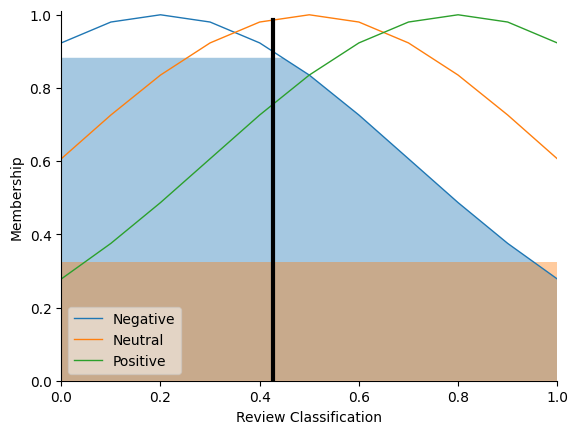

In [17]:
#bài2.9
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Sentiment Score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Emotion Intensity')
positive_words = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'Positive Words')
negative_words = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'Negative Words')
review_classification = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Review Classification')

sentiment_score['Negative'] = fuzz.gaussmf(sentiment_score.universe, 0.15, 0.1)
sentiment_score['Neutral'] = fuzz.gaussmf(sentiment_score.universe, 0.5, 0.2)
sentiment_score['Positive'] = fuzz.gaussmf(sentiment_score.universe, 0.85, 0.1)

emotion_intensity['Low'] = fuzz.gaussmf(emotion_intensity.universe, 0.2, 0.1)
emotion_intensity['Medium'] = fuzz.gaussmf(emotion_intensity.universe, 0.6, 0.2)
emotion_intensity['High'] = fuzz.gaussmf(emotion_intensity.universe, 0.9, 0.1)

positive_words['Few'] = fuzz.gaussmf(positive_words.universe, 1, 1)
positive_words['Some'] = fuzz.gaussmf(positive_words.universe, 3, 1)
positive_words['Many'] = fuzz.gaussmf(positive_words.universe, 6, 1)

negative_words['Few'] = fuzz.gaussmf(negative_words.universe, 1, 1)
negative_words['Some'] = fuzz.gaussmf(negative_words.universe, 3, 1)
negative_words['Many'] = fuzz.gaussmf(negative_words.universe, 6, 1)

review_classification['Negative'] = fuzz.gaussmf(review_classification.universe, 0.2, 0.5)
review_classification['Neutral'] = fuzz.gaussmf(review_classification.universe, 0.5, 0.5)
review_classification['Positive'] = fuzz.gaussmf(review_classification.universe, 0.8, 0.5)

rule1 = ctrl.Rule(sentiment_score['Negative'] & emotion_intensity['High'], review_classification['Negative'])
rule2 = ctrl.Rule(sentiment_score['Negative'] & emotion_intensity['Low'], review_classification['Neutral'])
rule3 = ctrl.Rule(sentiment_score['Neutral'] & emotion_intensity['Medium'], review_classification['Neutral'])
rule4 = ctrl.Rule(sentiment_score['Positive'] & emotion_intensity['High'], review_classification['Positive'])
rule5 = ctrl.Rule(positive_words['Many'] & negative_words['Few'], review_classification['Positive'])
rule6 = ctrl.Rule(positive_words['Few'] & negative_words['Many'], review_classification['Negative'])
rule7 = ctrl.Rule(positive_words['Some'] & negative_words['Some'], review_classification['Neutral'])
rule8 = ctrl.Rule(sentiment_score['Negative'] & negative_words['Many'] & emotion_intensity['High'], review_classification['Negative'])
rule9 = ctrl.Rule(sentiment_score['Neutral'] & emotion_intensity['Medium'] & positive_words['Some'], review_classification['Neutral'])
rule10 = ctrl.Rule(sentiment_score['Positive'] & positive_words['Many'] & emotion_intensity['High'], review_classification['Positive'])


review_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
review = ctrl.ControlSystemSimulation(review_ctrl)

review.input['Sentiment Score'] = 0.2
review.input['Emotion Intensity'] = 0.9
review.input['Positive Words'] = 1
review.input['Negative Words'] = 5

review.compute()
print("Review Classification Score: ",review.output['Review Classification'])
review_classification.view(sim=review)

Estimated Delivery Time:  15.492031922851785
Incentive Bonus:  0.6121894572660251
Driver Performance Rating:  2.9473704242125036


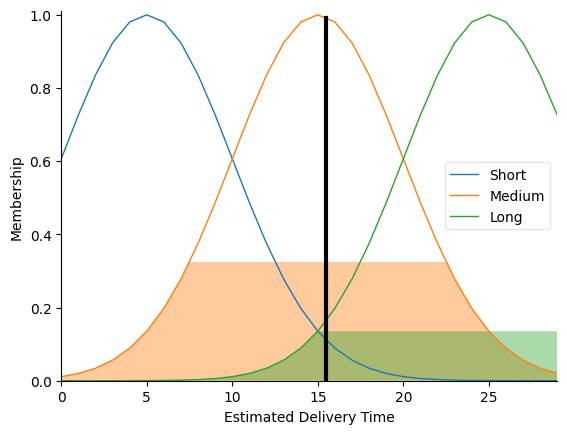

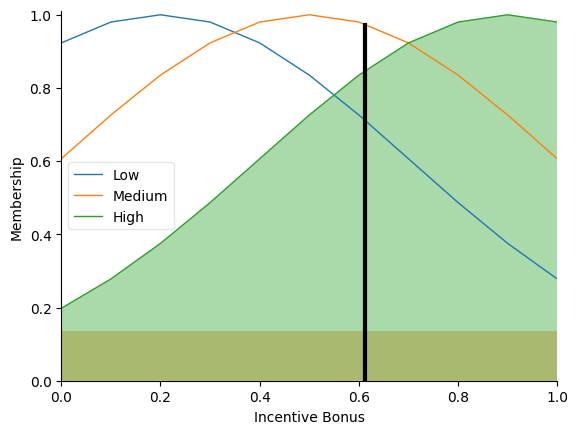

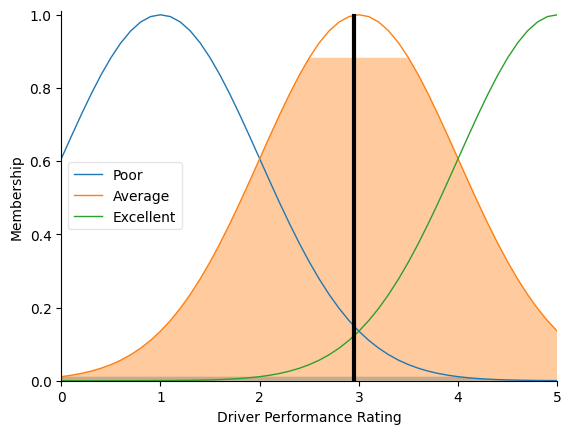

In [19]:
#bài2.10
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


traffic_condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Traffic Condition')
distance_to_customer = ctrl.Antecedent(np.arange(0, 10, 1), 'Distance to Customer')
weather_condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Weather Condition')
order_prep_time = ctrl.Antecedent(np.arange(0, 20, 1), 'Order Preparation Time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Driver Fatigue Level')

delivery_time = ctrl.Consequent(np.arange(0, 30, 1), 'Estimated Delivery Time')
incentive_bonus = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Incentive Bonus')
driver_performance = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'Driver Performance Rating')

traffic_condition['Low'] = fuzz.gaussmf(traffic_condition.universe, 0.2, 0.1)
traffic_condition['Medium'] = fuzz.gaussmf(traffic_condition.universe, 0.5, 0.2)
traffic_condition['High'] = fuzz.gaussmf(traffic_condition.universe, 0.9, 0.1)

distance_to_customer['Short'] = fuzz.gaussmf(distance_to_customer.universe, 1, 1)
distance_to_customer['Medium'] = fuzz.gaussmf(distance_to_customer.universe, 5, 1)
distance_to_customer['Long'] = fuzz.gaussmf(distance_to_customer.universe, 9, 1)

weather_condition['Clear'] = fuzz.gaussmf(weather_condition.universe, 0.2, 0.1)
weather_condition['Rainy'] = fuzz.gaussmf(weather_condition.universe, 0.5, 0.2)
weather_condition['Stormy'] = fuzz.gaussmf(weather_condition.universe, 0.9, 0.1)

order_prep_time['Fast'] = fuzz.gaussmf(order_prep_time.universe, 3, 1)
order_prep_time['Medium'] = fuzz.gaussmf(order_prep_time.universe, 10, 2)
order_prep_time['Slow'] = fuzz.gaussmf(order_prep_time.universe, 18, 1)

driver_fatigue['Low'] = fuzz.gaussmf(driver_fatigue.universe, 0.2, 0.1)
driver_fatigue['Medium'] = fuzz.gaussmf(driver_fatigue.universe, 0.5, 0.2)
driver_fatigue['High'] = fuzz.gaussmf(driver_fatigue.universe, 0.9, 0.1)

delivery_time['Short'] = fuzz.gaussmf(delivery_time.universe, 5, 5)
delivery_time['Medium'] = fuzz.gaussmf(delivery_time.universe, 15, 5)
delivery_time['Long'] = fuzz.gaussmf(delivery_time.universe, 25, 5)

incentive_bonus['Low'] = fuzz.gaussmf(incentive_bonus.universe, 0.2, 0.5)
incentive_bonus['Medium'] = fuzz.gaussmf(incentive_bonus.universe, 0.5, 0.5)
incentive_bonus['High'] = fuzz.gaussmf(incentive_bonus.universe, 0.9, 0.5)

driver_performance['Poor'] = fuzz.gaussmf(driver_performance.universe, 1, 1)
driver_performance['Average'] = fuzz.gaussmf(driver_performance.universe, 3, 1)
driver_performance['Excellent'] = fuzz.gaussmf(driver_performance.universe, 5, 1)

rule1 = ctrl.Rule(traffic_condition['Low'] & distance_to_customer['Short'], delivery_time['Short'])
rule2 = ctrl.Rule(traffic_condition['Medium'] & distance_to_customer['Medium'], delivery_time['Medium'])
rule3 = ctrl.Rule(traffic_condition['High'] & distance_to_customer['Long'], delivery_time['Long'])

rule4 = ctrl.Rule(weather_condition['Clear'], incentive_bonus['Low'])
rule5 = ctrl.Rule(weather_condition['Rainy'], incentive_bonus['Medium'])
rule6 = ctrl.Rule(weather_condition['Stormy'], incentive_bonus['High'])

rule7 = ctrl.Rule(order_prep_time['Fast'] & traffic_condition['Low'], delivery_time['Short'])
rule8 = ctrl.Rule(order_prep_time['Medium'] & traffic_condition['Medium'], delivery_time['Medium'])
rule9 = ctrl.Rule(order_prep_time['Slow'] & traffic_condition['High'], delivery_time['Long'])

rule10 = ctrl.Rule(driver_fatigue['Low'], driver_performance['Excellent'])
rule11 = ctrl.Rule(driver_fatigue['Medium'], driver_performance['Average'])
rule12 = ctrl.Rule(driver_fatigue['High'], driver_performance['Poor'])

rule13 = ctrl.Rule(distance_to_customer['Long'] & weather_condition['Stormy'] & traffic_condition['High'], delivery_time['Long'], incentive_bonus['High'])
rule14 = ctrl.Rule(distance_to_customer['Short'] & weather_condition['Clear'] & traffic_condition['Low'], delivery_time['Short'], incentive_bonus['Low'])
rule15 = ctrl.Rule(driver_fatigue['High'] & traffic_condition['High'], driver_performance['Poor'], delivery_time['Long'])


delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivering= ctrl.ControlSystemSimulation(delivery_ctrl)

delivering.input['Traffic Condition'] = 0.8
delivering.input['Distance to Customer'] = 7
delivering.input['Weather Condition'] = 0.9
delivering.input['Order Preparation Time'] = 12
delivering.input['Driver Fatigue Level'] = 0.6

delivering.compute()
print("Estimated Delivery Time: ",delivering.output['Estimated Delivery Time'])
print("Incentive Bonus: ",delivering.output['Incentive Bonus'])
print("Driver Performance Rating: ",delivering.output['Driver Performance Rating'])

delivery_time.view(sim=delivering)
incentive_bonus.view(sim=delivering)
driver_performance.view(sim=delivering)

Ride Fare:  76.04870384012705
Reward Points:  59.741460598856584


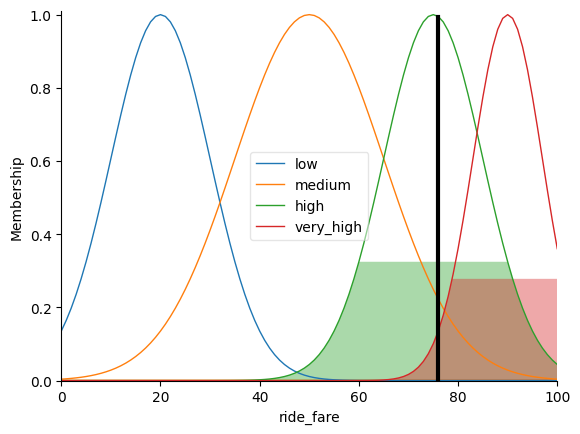

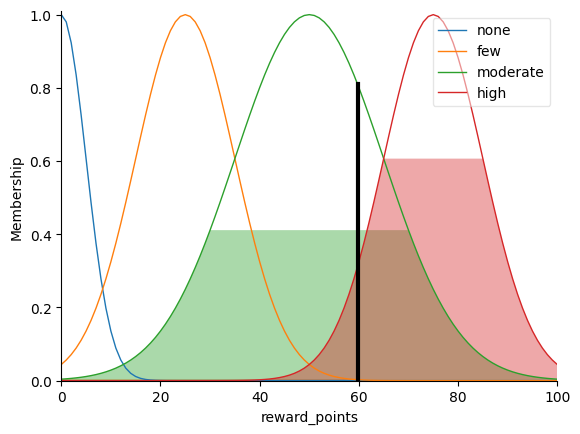

In [24]:
#hệ thống giá tiền grab bike
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ride_distance = ctrl.Antecedent(np.arange(0, 51, 1), 'ride_distance')
traffic_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_condition')
demand_level = ctrl.Antecedent(np.arange(0, 101, 1), 'demand_level')
weather_condition = ctrl.Antecedent(np.arange(0, 3, 1), 'weather_condition')
customer_rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'customer_rating')
ride_punctuality = ctrl.Antecedent(np.arange(0, 101, 1), 'ride_punctuality')


ride_fare = ctrl.Consequent(np.arange(0, 101, 1), 'ride_fare')
reward_points = ctrl.Consequent(np.arange(0, 101, 1), 'reward_points')


ride_distance['short'] = fuzz.gaussmf(ride_distance.universe, 2, 3)
ride_distance['medium'] = fuzz.gaussmf(ride_distance.universe, 10, 4)
ride_distance['long'] = fuzz.gaussmf(ride_distance.universe, 20, 5)
ride_distance['very_long'] = fuzz.gaussmf(ride_distance.universe, 35, 7)

traffic_condition['low'] = fuzz.gaussmf(traffic_condition.universe, 15, 10)
traffic_condition['medium'] = fuzz.gaussmf(traffic_condition.universe, 50, 15)
traffic_condition['high'] = fuzz.gaussmf(traffic_condition.universe, 85, 10)

demand_level['low'] = fuzz.gaussmf(demand_level.universe, 15, 10)
demand_level['medium'] = fuzz.gaussmf(demand_level.universe, 50, 15)
demand_level['high'] = fuzz.gaussmf(demand_level.universe, 85, 10)

weather_condition['good'] = fuzz.gaussmf(weather_condition.universe, 0, 0.5)
weather_condition['moderate'] = fuzz.gaussmf(weather_condition.universe, 1, 0.5)
weather_condition['bad'] = fuzz.gaussmf(weather_condition.universe, 2, 0.5)

customer_rating['poor'] = fuzz.gaussmf(customer_rating.universe, 2, 0.5)
customer_rating['average'] = fuzz.gaussmf(customer_rating.universe, 3.5, 0.7)
customer_rating['good'] = fuzz.gaussmf(customer_rating.universe, 5, 0.5)

ride_punctuality['late'] = fuzz.gaussmf(ride_punctuality.universe, 20, 15)
ride_punctuality['on_time'] = fuzz.gaussmf(ride_punctuality.universe, 50, 20)
ride_punctuality['early'] = fuzz.gaussmf(ride_punctuality.universe, 85, 10)

ride_fare['low'] = fuzz.gaussmf(ride_fare.universe, 20, 10)
ride_fare['medium'] = fuzz.gaussmf(ride_fare.universe, 50, 15)
ride_fare['high'] = fuzz.gaussmf(ride_fare.universe, 75, 10)
ride_fare['very_high'] = fuzz.gaussmf(ride_fare.universe, 90, 7)

reward_points['none'] = fuzz.gaussmf(reward_points.universe, 0, 5)
reward_points['few'] = fuzz.gaussmf(reward_points.universe, 25, 10)
reward_points['moderate'] = fuzz.gaussmf(reward_points.universe, 50, 15)
reward_points['high'] = fuzz.gaussmf(reward_points.universe, 75, 10)

rule1=ctrl.Rule(ride_distance['short'] & traffic_condition['low'] & demand_level['low'], ride_fare['low'])
rule2= ctrl.Rule(ride_distance['short'] & traffic_condition['medium'] & demand_level['high'], ride_fare['medium'])
rule3=ctrl.Rule(ride_distance['medium'] & traffic_condition['high'] & demand_level['high'], ride_fare['high'])
rule4=ctrl.Rule(ride_distance['long'] & traffic_condition['medium'] & weather_condition['good'], ride_fare['medium'])
rule5=ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & weather_condition['bad'], ride_fare['very_high'])
rule6=ctrl.Rule(ride_distance['very_long'] & traffic_condition['high'] & demand_level['high'], ride_fare['very_high'])
rule7=ctrl.Rule(ride_distance['medium'] & traffic_condition['low'] & demand_level['low'], ride_fare['medium'])
rule8=ctrl.Rule(ride_distance['short'] & traffic_condition['high'] & weather_condition['bad'], ride_fare['high'])
rule9=ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'], ride_fare['very_high'])
rule10=ctrl.Rule(customer_rating['good'] & ride_punctuality['early'], reward_points['high'])
rule11=ctrl.Rule(customer_rating['average'] & ride_punctuality['on_time'], reward_points['moderate'])
rule12=ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], reward_points['none'])
rule13=ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['on_time'], reward_points['high'])
rule14=ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & customer_rating['good'], reward_points['moderate'])
rule15=ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], reward_points['none'])
rule16=ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'] & customer_rating['good'], reward_points['high'])
rule17=ctrl.Rule(ride_distance['short'] & customer_rating['average'] & ride_punctuality['on_time'], reward_points['few'])
rule18=ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['late'], reward_points['few'])
rule19=ctrl.Rule(ride_distance['medium'] & weather_condition['moderate'] & customer_rating['good'], reward_points['moderate'])
rule20=ctrl.Rule(ride_distance['long'] & demand_level['high'] & customer_rating['good'], reward_points['high'])

pricing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
pricing_sim = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing_sim.input['ride_distance'] = 12
pricing_sim.input['traffic_condition'] = 70
pricing_sim.input['demand_level'] = 80
pricing_sim.input['weather_condition'] = 2
pricing_sim.input['customer_rating'] = 4.5
pricing_sim.input['ride_punctuality'] = 85


pricing_sim.compute()


print("Ride Fare: ",pricing_sim.output['ride_fare'])
print("Reward Points: ",pricing_sim.output['reward_points'])
ride_fare.view(sim=pricing_sim)
reward_points.view(sim=pricing_sim)

Discount Rate:  44.32446187678828


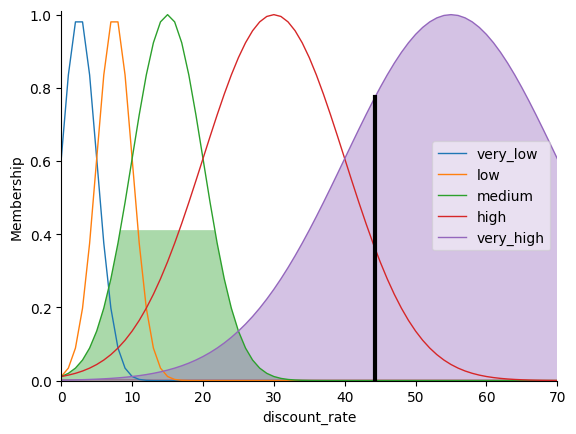

In [32]:
#chiết khấu khách hàng ở shoppee
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating = ctrl.Antecedent(np.arange(3.5, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 3, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_discounts')

discount_rate = ctrl.Consequent(np.arange(0, 71, 1), 'discount_rate')

store_rating['low'] = fuzz.gaussmf(store_rating.universe, 3.7, 0.2)
store_rating['medium'] = fuzz.gaussmf(store_rating.universe, 4.3, 0.2)
store_rating['high'] = fuzz.gaussmf(store_rating.universe, 4.8, 0.2)

sales_volume['low'] = fuzz.gaussmf(sales_volume.universe, 20, 15)
sales_volume['medium'] = fuzz.gaussmf(sales_volume.universe, 50, 15)
sales_volume['high'] = fuzz.gaussmf(sales_volume.universe, 80, 15)

profit_margin['low'] = fuzz.gaussmf(profit_margin.universe, 20, 15)
profit_margin['medium'] = fuzz.gaussmf(profit_margin.universe, 50, 15)
profit_margin['high'] = fuzz.gaussmf(profit_margin.universe, 80, 15)

seasonal_event['none'] = fuzz.gaussmf(seasonal_event.universe, 0, 0.5)
seasonal_event['moderate'] = fuzz.gaussmf(seasonal_event.universe, 1, 0.5)
seasonal_event['high'] = fuzz.gaussmf(seasonal_event.universe, 2, 0.5)

competitor_discounts['low'] = fuzz.gaussmf(competitor_discounts.universe, 20, 15)
competitor_discounts['medium'] = fuzz.gaussmf(competitor_discounts.universe, 50, 15)
competitor_discounts['high'] = fuzz.gaussmf(competitor_discounts.universe, 80, 15)

discount_rate['very_low'] = fuzz.gaussmf(discount_rate.universe, 2.5, 2.5)
discount_rate['low'] = fuzz.gaussmf(discount_rate.universe, 7.5, 2.5)
discount_rate['medium'] = fuzz.gaussmf(discount_rate.universe, 15, 5)
discount_rate['high'] = fuzz.gaussmf(discount_rate.universe, 30, 10)
discount_rate['very_high'] = fuzz.gaussmf(discount_rate.universe, 55, 15)

rule1=ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount_rate['very_low'])
rule2=ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount_rate['high'])
rule3=ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount_rate['very_high'])
rule4=ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount_rate['medium'])
rule5=ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount_rate['very_low'])
rule6=ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount_rate['medium'])
rule7=ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount_rate['very_high'])

pricing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
pricing_sim = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing_sim.input['store_rating']= 4.3
pricing_sim.input['sales_volume']= 50
pricing_sim.input['profit_margin']= 30
pricing_sim.input['seasonal_event']= 2
pricing_sim.input['competitor_discounts']= 80

pricing_sim.compute()
discount_rate.view(sim=pricing_sim)
print("Discount Rate: ",pricing_sim.output['discount_rate'])


Recommended Discount Percentage:  20.0


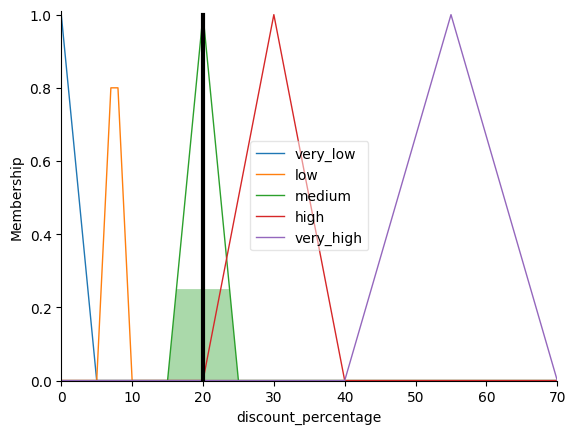

In [39]:
#Kế hoạch chiến lược bán hàng của shoppee
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'product_demand')
competitor_pressure = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_demand')

discount_percentage = ctrl.Consequent(np.arange(0, 71, 1), 'discount_percentage')

product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 4])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [2, 5, 8])
product_demand['high'] = fuzz.trimf(product_demand.universe, [6, 10, 10])

competitor_pressure['low'] = fuzz.trimf(competitor_pressure.universe, [0, 0, 4])
competitor_pressure['medium'] = fuzz.trimf(competitor_pressure.universe, [2, 5, 8])
competitor_pressure['high'] = fuzz.trimf(competitor_pressure.universe, [6, 10, 10])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 4])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [2, 5, 8])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [6, 10, 10])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 30])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [20, 50, 80])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [60, 100, 100])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 4])
seasonal_demand['medium'] = fuzz.trimf(seasonal_demand.universe, [2, 5, 9])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [6, 10, 10])

discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 0, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5, 7.5, 10])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [15, 20, 25])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20, 30, 40])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 55, 70])

rule1 = ctrl.Rule(product_demand['high'] & competitor_pressure['low'] & profit_margin['low'], discount_percentage['very_low'])
rule2 = ctrl.Rule(product_demand['low'] & competitor_pressure['high'] & profit_margin['high'], discount_percentage['high'])
rule3 = ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium'])
rule4 = ctrl.Rule(competitor_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high'])
rule5 = ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium'])
rule6 = ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pressure['low'], discount_percentage['very_low'])
rule7 = ctrl.Rule(profit_margin['high'] & competitor_pressure['medium'] & seasonal_demand['medium'], discount_percentage['medium'])

discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
discount_sim = ctrl.ControlSystemSimulation(discount_ctrl)

discount_sim.input['product_demand'] = 8
discount_sim.input['competitor_pressure'] = 5
discount_sim.input['store_reputation'] = 6
discount_sim.input['profit_margin'] = 70
discount_sim.input['seasonal_demand'] = 8

discount_sim.compute()

print("Recommended Discount Percentage: ",discount_sim.output['discount_percentage'])
discount_percentage.view(sim=discount_sim)

Recommended Discount Percentage:  24.48463801690208


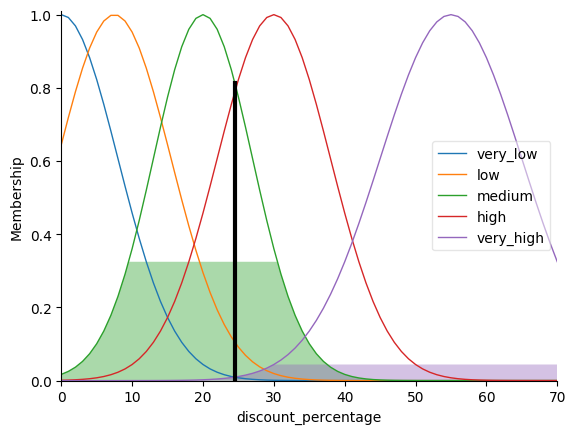

In [15]:
#Kế hoạch chiến lược bán hàng của shoppee
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'product_demand')
competitor_pressure = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_demand')

discount_percentage = ctrl.Consequent(np.arange(0, 71, 1), 'discount_percentage')

product_demand['low'] = fuzz.gaussmf(product_demand.universe, 0, 2)
product_demand['medium'] = fuzz.gaussmf(product_demand.universe, 5, 2)
product_demand['high'] = fuzz.gaussmf(product_demand.universe, 10, 2)

competitor_pressure['low'] = fuzz.gaussmf(competitor_pressure.universe, 0, 2)
competitor_pressure['medium'] = fuzz.gaussmf(competitor_pressure.universe, 5, 2)
competitor_pressure['high'] = fuzz.gaussmf(competitor_pressure.universe, 10, 2)

store_reputation['low'] = fuzz.gaussmf(store_reputation.universe, 0, 2)
store_reputation['medium'] = fuzz.gaussmf(store_reputation.universe, 5, 2)
store_reputation['high'] = fuzz.gaussmf(store_reputation.universe, 10, 2)

profit_margin['low'] = fuzz.gaussmf(profit_margin.universe, 0, 15)
profit_margin['medium'] = fuzz.gaussmf(profit_margin.universe, 50, 20)
profit_margin['high'] = fuzz.gaussmf(profit_margin.universe, 100, 20)

seasonal_demand['none'] = fuzz.gaussmf(seasonal_demand.universe, 0, 2)
seasonal_demand['medium'] = fuzz.gaussmf(seasonal_demand.universe, 5, 2)
seasonal_demand['high'] = fuzz.gaussmf(seasonal_demand.universe, 10, 2)

discount_percentage['very_low'] = fuzz.gaussmf(discount_percentage.universe, 0, 8)
discount_percentage['low'] = fuzz.gaussmf(discount_percentage.universe, 7.5, 8)
discount_percentage['medium'] = fuzz.gaussmf(discount_percentage.universe, 20, 7)
discount_percentage['high'] = fuzz.gaussmf(discount_percentage.universe, 30, 8)
discount_percentage['very_high'] = fuzz.gaussmf(discount_percentage.universe, 55, 10)

rule1 = ctrl.Rule(product_demand['high'] & competitor_pressure['low'] & profit_margin['low'], discount_percentage['very_low'])
rule2 = ctrl.Rule(product_demand['low'] & competitor_pressure['high'] & profit_margin['high'], discount_percentage['high'])
rule3 = ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium'])
rule4 = ctrl.Rule(competitor_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high'])
rule5 = ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium'])
rule6 = ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pressure['low'], discount_percentage['very_low'])
rule7 = ctrl.Rule(profit_margin['high'] & competitor_pressure['medium'] & seasonal_demand['medium'], discount_percentage['medium'])

discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
discount_sim = ctrl.ControlSystemSimulation(discount_ctrl)

discount_sim.input['product_demand'] = 8
discount_sim.input['competitor_pressure'] = 5
discount_sim.input['store_reputation'] = 6
discount_sim.input['profit_margin'] = 70
discount_sim.input['seasonal_demand'] = 8

discount_sim.compute()

print("Recommended Discount Percentage: ",discount_sim.output['discount_percentage'])
discount_percentage.view(sim=discount_sim)


Number of Orders to Combine:  4.999999999999999
Delivery Priority:  4.7111328055419905


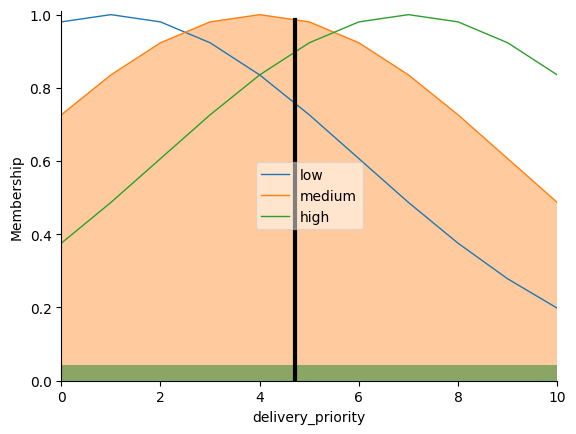

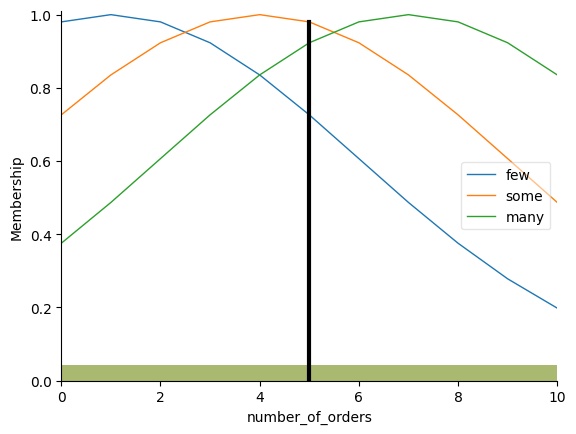

In [23]:
#Tối ưu hóa thời gian giao hàng và thu nhập cho tài xế
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

order_density = ctrl.Antecedent(np.arange(0, 11, 1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 11, 1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 11, 1), 'driver_load')
traffic_conditions = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_conditions')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 11, 1), 'profit_per_delivery')

number_of_orders = ctrl.Consequent(np.arange(0, 11, 1), 'number_of_orders')
delivery_priority = ctrl.Consequent(np.arange(0, 11, 1), 'delivery_priority')


order_density['low'] = fuzz.gaussmf(order_density.universe, 0, 2)
order_density['medium'] = fuzz.gaussmf(order_density.universe, 5, 2)
order_density['high'] = fuzz.gaussmf(order_density.universe, 10, 2)

delivery_urgency['low'] = fuzz.gaussmf(delivery_urgency.universe, 0, 2)
delivery_urgency['medium'] = fuzz.gaussmf(delivery_urgency.universe, 5, 2)
delivery_urgency['high'] = fuzz.gaussmf(delivery_urgency.universe, 10, 2)

driver_load['low'] = fuzz.gaussmf(driver_load.universe, 0, 2)
driver_load['medium'] = fuzz.gaussmf(driver_load.universe, 5, 2)
driver_load['high'] = fuzz.gaussmf(driver_load.universe, 10, 2)

traffic_conditions['low'] = fuzz.gaussmf(traffic_conditions.universe, 0, 2)
traffic_conditions['medium'] = fuzz.gaussmf(traffic_conditions.universe, 5, 2)
traffic_conditions['high'] = fuzz.gaussmf(traffic_conditions.universe, 10, 2)

profit_per_delivery['low'] = fuzz.gaussmf(profit_per_delivery.universe, 0, 2)
profit_per_delivery['medium'] = fuzz.gaussmf(profit_per_delivery.universe, 5, 2)
profit_per_delivery['high'] = fuzz.gaussmf(profit_per_delivery.universe, 10, 2)

number_of_orders['few'] = fuzz.gaussmf(number_of_orders.universe, 1, 5)
number_of_orders['some'] = fuzz.gaussmf(number_of_orders.universe, 4, 5)
number_of_orders['many'] = fuzz.gaussmf(number_of_orders.universe, 7, 5)

delivery_priority['low'] = fuzz.gaussmf(delivery_priority.universe, 1, 5)
delivery_priority['medium'] = fuzz.gaussmf(delivery_priority.universe, 4, 5)
delivery_priority['high'] = fuzz.gaussmf(delivery_priority.universe, 7, 5)

rule1 = ctrl.Rule(order_density['high'] & driver_load['low'] & traffic_conditions['low'], number_of_orders['many'])
rule2 = ctrl.Rule(order_density['medium'] & traffic_conditions['high'] & delivery_urgency['medium'], number_of_orders['some'])
rule3 = ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], number_of_orders['some'])
rule4 = ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic_conditions['medium'], number_of_orders['some'])
rule5 = ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic_conditions['high'], number_of_orders['some'])
rule6 = ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority['high'])
rule7 = ctrl.Rule(delivery_urgency['medium'] & traffic_conditions['medium'], delivery_priority['medium'])
rule8 = ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority['low'])

delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)

delivery_sim.input['order_density'] = 8
delivery_sim.input['delivery_urgency'] = 5
delivery_sim.input['driver_load'] = 2
delivery_sim.input['traffic_conditions'] = 5
delivery_sim.input['profit_per_delivery'] = 5

delivery_sim.compute()

delivery_priority.view(sim=delivery_sim)
number_of_orders.view(sim=delivery_sim)

num_orders = delivery_sim.output['number_of_orders']
priority = delivery_sim.output['delivery_priority']
print("Number of Orders to Combine: ",num_orders)
print("Delivery Priority: ",priority)